# Problem statement.

# Build a recommender system by using cosine simillarties score.


In [1]:
import pandas as pd
import numpy as np
#books = pd.read_csv("C:/Users/HARSHA/Downloads/book.csv",encoding = "ISO-8859-1")
#print(books.shape) 
#books.columns

In [3]:
books = pd.read_csv("book.csv",encoding = "ISO-8859-1")
books

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [4]:
books.columns

Index(['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

In [5]:
books.drop('Unnamed: 0',axis=1,inplace = True)

In [6]:
books = books.rename(columns={'User.ID':'userid','Book.Title':'book','Book.Rating':'rating'})
books

,userid,book,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [7]:
import seaborn as sns

<AxesSubplot:xlabel='rating', ylabel='count'>

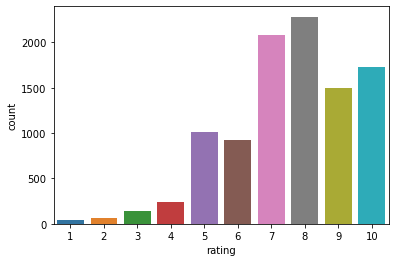

In [8]:
sns.countplot(x = books.rating)

In [9]:
books.userid.unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129], dtype=int64)

In [10]:
books.userid.nunique()

2182

In [11]:
books.book.unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [12]:
books.book.nunique()

9659

In [15]:
book_df = books.pivot_table(index = 'userid',columns = 'book',values ='rating').fillna(0)
book_df.index = books.userid.unique()
book_df

book,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [20]:
user_sim = 1 - pairwise_distances(book_df.values,metric = 'cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [21]:
np.fill_diagonal(user_sim, 0)
user_sim

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
user_sim_df.index = books.userid.unique()
user_sim_df.columns = books.userid.unique()
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:10]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
276745    276726
276747    276726
276748    161677
276751    276726
276754    276726
dtype: int64

In [25]:
books[(books['userid']==276726) | (books['userid']==276729)]

,userid,book,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6


In [26]:
books[(books['userid']==276726) | (books['userid']==276736)]

,userid,book,rating
0,276726,Classical Mythology,5
3,276736,Flu: The Story of the Great Influenza Pandemic...,8


In [27]:
books[(books['userid']==276726) | (books['userid']==276737)]

,userid,book,rating
0,276726,Classical Mythology,5
4,276737,The Mummies of Urumchi,6


In [28]:
books[(books['userid']==276726) | (books['userid']==276744)]

,userid,book,rating
0,276726,Classical Mythology,5
5,276744,The Kitchen God's Wife,7


In [29]:
books[(books['userid']==276726) | (books['userid']==276745)]

,userid,book,rating
0,276726,Classical Mythology,5
6,276745,What If?: The World's Foremost Military Histor...,10


In [30]:
books[(books['userid']==276726) | (books['userid']==276747)]

,userid,book,rating
0,276726,Classical Mythology,5
7,276747,PLEADING GUILTY,9
8,276747,Under the Black Flag: The Romance and the Real...,9
9,276747,Where You'll Find Me: And Other Stories,8
10,276747,Nights Below Station Street,7
11,276747,Hitler's Secret Bankers: The Myth of Swiss Neu...,7


In [31]:
books[(books['userid']==161677) | (books['userid']==276748)]

,userid,book,rating
12,276748,The Middle Stories,6
9190,161677,The Biggest Pumpkin Ever,8
9191,161677,The Twelve Dancing Princesses: A Folk Tale fro...,9
9192,161677,Do You Know?,5
9193,161677,The good-by day (A Little golden book),8
9194,161677,Pooh Trick or Treat! (Little Golden Books),6
9195,161677,Cookie Monster/Cookie Tree,8
9196,161677,My Little Golden Book of Cars and Trucks (Litt...,7
9197,161677,I Think That It is Wonderful: Featuring Jim He...,8
9198,161677,Grover's Own Alphabet,8


In [32]:
books[(books['userid']==276726) | (books['userid']==276751)]

,userid,book,rating
0,276726,Classical Mythology,5
13,276751,Jane Doe,8


In [33]:
books[(books['userid']==276726) | (books['userid']==276754)]

,userid,book,rating
0,276726,Classical Mythology,5
14,276754,A Second Chicken Soup for the Woman's Soul (Ch...,8


In [34]:
def get_user_similar_books(user1,user2):
    common_books = books[books.userid == user1].merge(books[books.userid == user2],
                                                     on = 'book',
                                                     how = 'inner')
    return common_books.merge(books, on = 'book')

In [37]:
common_books = get_user_similar_books(278202,276798)
common_books

,userid_x,book,rating_x,userid_y,rating_y,userid,rating
0,278202,To Kill a Mockingbird,9,276798,7,276798,7
1,278202,To Kill a Mockingbird,9,276798,7,278202,9
